In [1]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [3]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [4]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [5]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Animation' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1972, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']


In [6]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1973: 4, 1974: 1, 1975: 1, 1977: 4, 1978: 2, 1979: 1, 1981: 2, 1982: 5, 1985: 5, 1986: 7, 1987: 3, 1988: 6, 1989: 2, 1990: 4, 1991: 3, 1992: 7, 1993: 7, 1994: 6, 1995: 5, 1996: 6, 1997: 2, 1998: 8, 1999: 6, 2000: 14, 2001: 11, 2002: 12, 2003: 11, 2004: 10, 2005: 10, 2006: 19, 2007: 13, 2008: 15, 2009: 20, 2010: 11, 2011: 18, 2012: 18, 2013: 6, 2014: 4, 2015: 7, 2016: 3}})

In [7]:
history_df

,count,rolling mean,difference from mean
1972,0,NaN,NaN
1973,4,NaN,NaN
1974,1,NaN,NaN
1975,1,NaN,NaN
1976,0,NaN,NaN
1977,4,1.2,3.333333
1978,2,2.0,1.000000
1979,1,1.6,0.625000
1980,0,1.6,0.000000
1981,2,1.4,1.428571


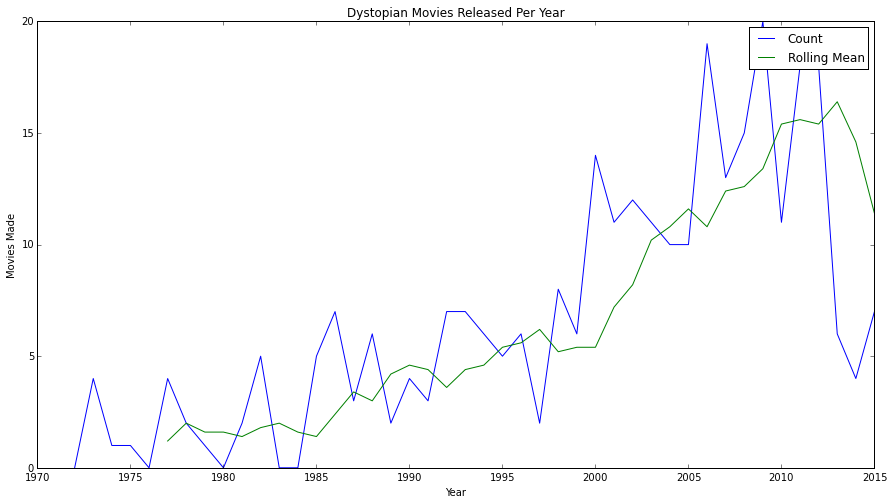

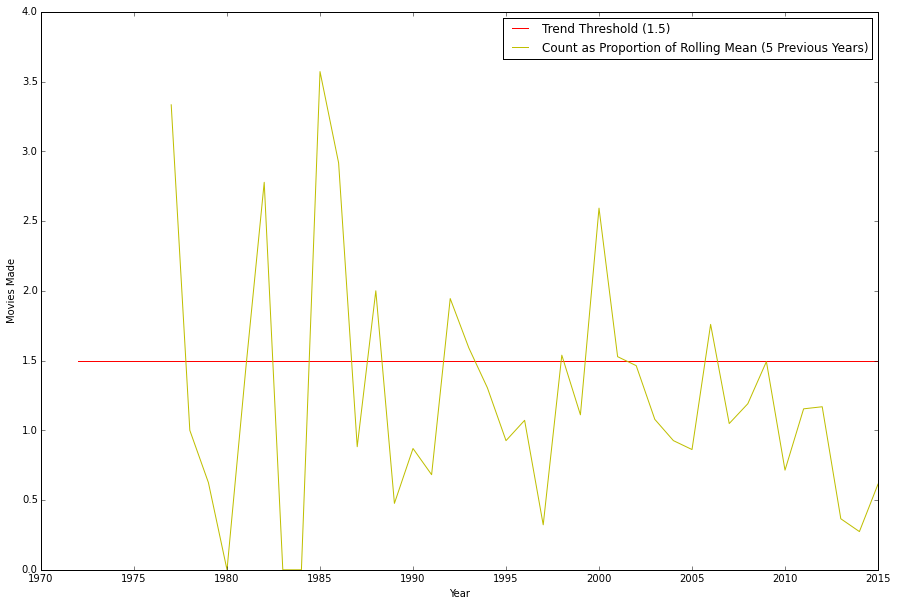

In [8]:
df = history_df.reset_index()
df['cutoff'] = 1.5
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
count_line = plt.plot(date, count, label=count)
rolling_mean_line = plt.plot(date,rolling_mean, label=rolling_mean)
plt.legend(['Count','Rolling Mean'])
plt.title('Dystopian Movies Released Per Year')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

# red dashes, blue squares and green triangles
figure(figsize=(15,10))
count_line = plt.plot(date, cutoff, 'r-', label=count)
rolling_mean_line = plt.plot(date, difference_mean, 'y-', label=count)
plt.legend(['Trend Threshold (1.5)', 'Count as Proportion of Rolling Mean (5 Previous Years)'])
plt.title('')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

In [9]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Animation' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [10]:
history_dic

defaultdict(<type 'dict'>, {1973: {'Robin Hood': defaultdict(<type 'dict'>, {'date': '6 December 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Fantastic Planet': defaultdict(<type 'dict'>, {'date': '1 December 1973', 'screens': 'Error', 'opening': 'N/A'}), "Charlotte's Web": defaultdict(<type 'dict'>, {'date': '1 March 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Heavy Traffic': defaultdict(<type 'dict'>, {'date': '17 November 1973', 'screens': 'Error', 'opening': 'N/A'})}, 1974: {'The Nine Lives of Fritz the Cat': defaultdict(<type 'dict'>, {'date': '18 September 1974', 'screens': 'Error', 'opening': 'N/A'})}, 1975: {'Coonskin': defaultdict(<type 'dict'>, {'date': '20 August 1975', 'screens': 'Error', 'opening': 'N/A'})}, 1977: {'The Rescuers': defaultdict(<type 'dict'>, {'date': '22 June 1977', 'screens': 'n/a', 'opening': 'n/a'}), 'Wizards': defaultdict(<type 'dict'>, {'date': '9 February 1977', 'screens': 'n/a', 'opening': 'n/a'}), 'The Many Adventures of Winnie the Pooh': def

In [11]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [12]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1982,Heidi's Song,1982-11-19,982,1416713,1442.681263
1,1982,The Last Unicorn,1982-11-19,648,2250000,3472.222222
2,1982,The Secret of NIMH,1982-07-02,88,386530,4392.386364
3,1985,Rainbow Brite and the Star Stealer,1985-11-15,1088,1847962,1698.494485
4,1985,Starchaser: The Legend of Orin,1985-11-22,1020,1614660,1583.000000
5,1985,The Care Bears Movie,1985-03-29,898,1314993,1464.357461
6,1986,An American Tail,1986-11-21,1246,5234446,4201.000000
7,1986,Care Bears Movie II: A New Generation,1986-03-21,55,243161,4421.109091
8,1986,GoBots: Battle of the Rock Lords,1986-03-21,1045,531905,509.000000
9,1986,My Little Pony: The Movie,1986-06-06,421,416108,988.380048


In [19]:

trend = genre1[55:83]
trend = trend[trend.screens > 3000]


trend

,level_0,level_1,date,screens,opening,normalized_opening
57,2000,Dinosaur,2000-05-19,3257,38854851,11929.644151
63,2000,The Road to El Dorado,2000-03-31,3218,12846652,3992.123058
67,2001,Jimmy Neutron: Boy Genius,2001-12-21,3139,13832786,4406.749283
69,2001,"Monsters, Inc.",2001-11-02,3237,62577067,19331.809391
72,2001,Shrek,2001-05-18,3587,42347760,11805.899080
74,2002,Ice Age,2002-03-15,3316,46312454,13966.361279
76,2002,Lilo Stitch,2002-06-21,3191,35260212,11049.894077
78,2002,Spirit: Stallion of the Cimarron,2002-05-24,3317,17770036,5357.261381
79,2002,Stuart Little 2,2002-07-19,3255,15115152,4643.671889
81,2002,The Wild Thornberrys Movie,2002-12-20,3012,6013847,1996.629150


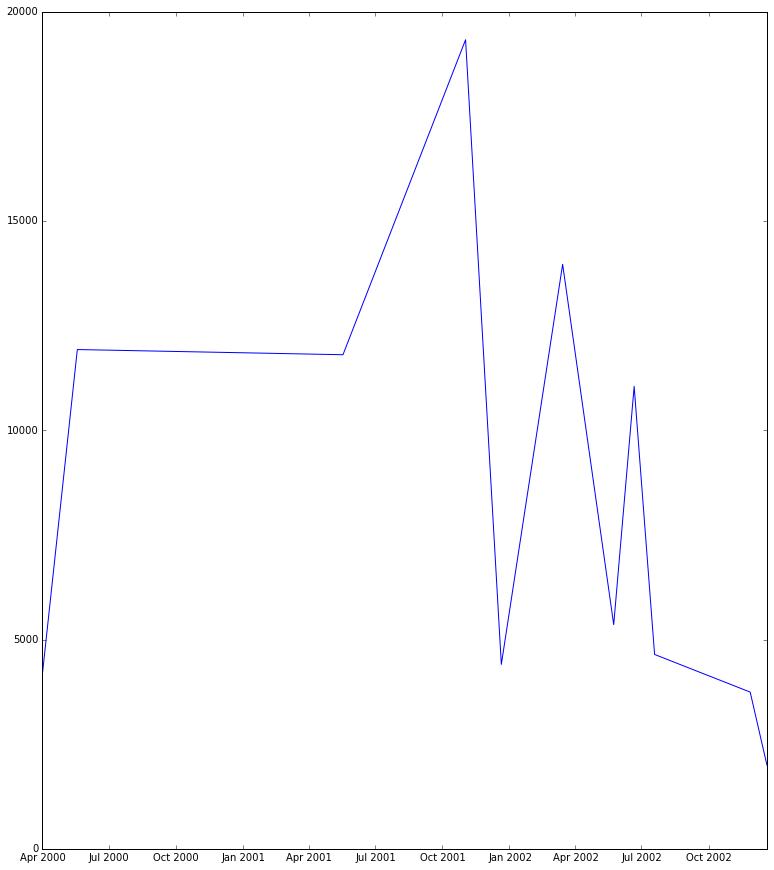

In [20]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

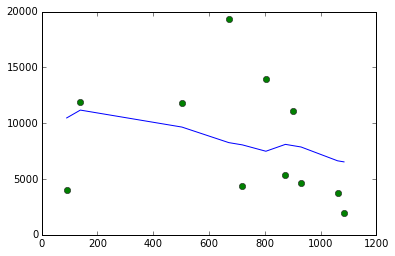

In [21]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2000-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 'Winter'
    if x in [5, 6, 7, 8]:
        return 'Summer'
    if x in [9, 10,]:
        return 'Fall'
    if x in [2, 3, 4,]:
        return 'Spring'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [16]:
trend = trend.reset_index()

In [17]:

with open('animation_df.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)

In [18]:
trend

,index,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
0,64,2000,The Tigger Movie,2000-02-11,2723,9427532,3462.185824,41 days 00:00:00,41,Spring
1,63,2000,The Road to El Dorado,2000-03-31,3218,12846652,3992.123058,90 days 00:00:00,90,Spring
2,57,2000,Dinosaur,2000-05-19,3257,38854851,11929.644151,139 days 00:00:00,139,Summer
3,58,2000,Fantasia/2000,2000-06-16,1313,2911485,2217.429551,167 days 00:00:00,167,Summer
4,65,2000,Titan A.E.,2000-06-16,2734,9376845,3429.716533,167 days 00:00:00,167,Summer
5,55,2000,Chicken Run,2000-06-23,2491,17506162,7027.764753,174 days 00:00:00,174,Summer
6,61,2000,The Adventures of Rocky Bullwinkle,2000-06-30,2460,6814270,2770.028455,181 days 00:00:00,181,Summer
7,59,2000,Pokemon: Power of One,2000-07-21,2752,19575608,7113.229651,202 days 00:00:00,202,Summer
8,56,2000,Digimon: The Movie,2000-10-06,1823,4233304,2322.163467,279 days 00:00:00,279,Fall
9,60,2000,Rugrats in Paris: The Movie,2000-11-17,2934,22718184,7743.075665,321 days 00:00:00,321,Winter
